In [2]:
import pandas as pd
import numpy as np

## Task 1

In [3]:
data = pd.read_csv('impression_log.csv')
data.head()

,Unnamed: 0,LogEntryTime,AdvertiserId,CampaignId,AdGroupId,AudienceID,CreativeId,AdFormat,Frequency,Site,...,DeviceType,OSFamily,OS,Browser,DeviceMake,AdvertiserCurrency,click,engagement,video-end,video-start
0,00006a06-14e2-47d9-b999-fbeeac67dd2b,2021-09-25 00:22:37,868ko1s,t29si1w,e9qf2dm,0,9wkrkl5j,300x250,0,scrabblewordfinder.org,...,4,5.0,173.0,7.0,Apple,0.006409,0,0,0,0
1,00007898-29c9-43f1-82e5-43c5a856d0f4,2021-09-25 02:31:35,868ko1s,fiwemi8,8m750eh,0,zhre4utp,300x250,0,www.thecoli.com,...,4,5.0,173.0,7.0,Apple,0.002778,0,0,0,0
2,0000d06f-5239-4123-af41-bd1c0e0e8d48,2021-09-25 20:12:52,868ko1s,awbu4q4,oropida,lnqjhqm,ab6spdyi,300x250,0,www.today.com,...,4,6.0,156.0,6.0,Samsung,0.008947,0,0,0,0
3,0000d623-aaf1-4be8-81f7-eb6c96b30aee,2021-09-22 16:04:12,868ko1s,t29si1w,e9qf2dm,0,2spj6krt,300x250,0,www.cbssports.com,...,4,5.0,101.0,7.0,Apple,0.007673,0,0,0,0
4,0000e836-9778-4ea9-b686-9e7bf26f90bd,2021-09-22 14:33:59,868ko1s,awbu4q4,oropida,lnqjhqm,ql1q5nq9,300x250,0,backroadramblers.com,...,4,5.0,101.0,7.0,Apple,0.008852,0,1,1,1


In [4]:
eng = data[['Site', 'click', 'engagement']].groupby('Site').agg(['sum','count']).reset_index()
new_df = pd.DataFrame({
    'Site': eng['Site'], 
    'engagement_rate': eng['engagement']['sum']/eng['engagement']['count'],
    'click_through_rate': eng['click']['sum']/eng['engagement']['sum']
    })
new_df.describe()

,engagement_rate,click_through_rate
count,8538.000000,2757.000000
mean,0.104691,inf
std,0.221900,NaN
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.166667
75%,0.117647,0.666667
max,1.000000,inf


In [5]:
def score_sites(df, campaign_id):
    new_df = df[df['CampaignId'] == campaign_id]
    eng = df[['Site', 'click', 'engagement']].groupby('Site').agg(['sum','count']).reset_index()
    scores = pd.DataFrame({
        'Site': eng['Site'], 
        'engagement_rate': eng['engagement']['sum']/eng['engagement']['count'],
        'click_through_rate': eng['click']['sum']/eng['engagement']['sum']
        })
    return scores.sort_values('engagement_rate', ascending = False)


In [6]:
scored = score_sites(data, 't29si1w')

In [7]:
scored.head(10)

,Site,engagement_rate,click_through_rate
3235,richmond.com,1.0,0.000000
3013,plantforsuccess.com,1.0,0.000000
5274,www.dallasnews.com,1.0,1.000000
6401,www.littlehouseoffour.com,1.0,0.000000
1330,flowracers.com,1.0,0.333333
3579,stackyourdollars.com,1.0,0.000000
3009,plantbasedfolk.com,1.0,0.000000
1903,imperfectfamilies.com,1.0,1.000000
7191,www.quikr.com,1.0,0.000000
1906,indianajo.com,1.0,1.000000


## Task 3

In [9]:
importance = data[['AdFormat', 'FoldPosition', 'OS', 'DeviceType', 'engagement']]
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
importance['AdFormat'] = le.fit_transform(importance['AdFormat'])
importance['OS'] = le.fit_transform(importance['OS'])
X, y = importance[['AdFormat', 'FoldPosition', 'OS', 'DeviceType']], importance['engagement']
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
clf.score(X,y)

0.87082

## Feature Importance

<AxesSubplot:>

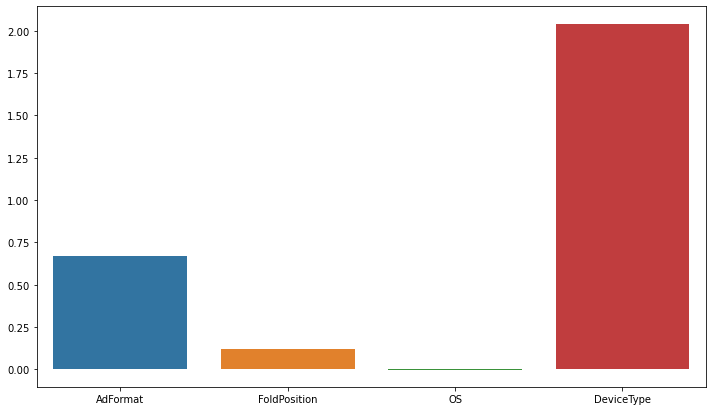

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.barplot(x = importance.drop(['engagement'], axis = 1).columns, y = clf.coef_[0])